In [71]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns



In [72]:
df = pd.read_csv("imdb_labelled.csv", header=None)
df.columns = ['message', 'sentiment']
df = df.dropna()
df = df.drop_duplicates()

print(df)

                                               message  sentiment
0    A very, very, very slow-moving, aimless movie ...        0.0
1    Not sure who was more lost - the flat characte...        0.0
2    Attempting artiness with black & white and cle...        0.0
3         Very little music or anything to speak of.          0.0
4    The best scene in the movie was when Gerardo i...        1.0
5    The rest of the movie lacks art, charm, meanin...        0.0
6                                  Wasted two hours.          0.0
7    Saw the movie today and thought it was a good ...        1.0
8                                 A bit predictable.          0.0
9    Loved the casting of Jimmy Buffet as the scien...        1.0
10                And those baby owls were adorable.          1.0
11   The movie showed a lot of Florida at it's best...        1.0
12   The Songs Were The Best And The Muppets Were S...        1.0
13                                   It Was So Cool.          1.0
14   This 

In [73]:
keywords = ['bad', 'boring', 'worst', 'wasted', 'little', 'horrible', 'slow-moving', 'hated', 'vomit']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
print(df.head())

                                             message  sentiment    bad  \
0  A very, very, very slow-moving, aimless movie ...        0.0  False   
1  Not sure who was more lost - the flat characte...        0.0  False   
2  Attempting artiness with black & white and cle...        0.0  False   
3       Very little music or anything to speak of.          0.0  False   
4  The best scene in the movie was when Gerardo i...        1.0  False   

   boring  worst  wasted  little  horrible  slow-moving  hated  
0   False  False   False   False     False        False  False  
1   False  False   False   False     False        False  False  
2   False  False   False   False     False        False  False  
3   False  False   False    True     False        False  False  
4   False  False   False   False     False        False  False  


AxesSubplot(0.125,0.125;0.62x0.755)


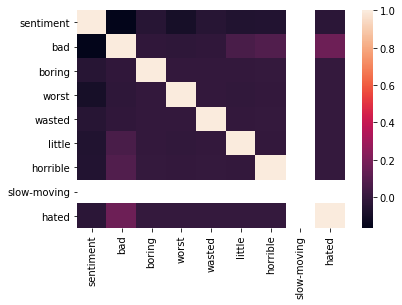

In [74]:
df_heat = sns.heatmap(df.corr())

print(df_heat)

In [75]:
data = df[keywords]
target = df['sentiment']

In [76]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 992 points : 445
